In [18]:
import pandas as pd

In [19]:
train = pd.read_csv("california_housing_train.csv", sep=",")
test = pd.read_csv("california_housing_test.csv", sep=",")
train.shape, test.shape

((17000, 9), (3000, 9))

In [20]:
### 데이터 확인
print("test 데이터 셋 행열 크기 :", test.shape) 
print("train 데이터 셋 행열 크기 : ", train.shape)

test 데이터 셋 행열 크기 : (3000, 9)
train 데이터 셋 행열 크기 :  (17000, 9)


In [21]:
### 어떤 컬럼명을 가지고 있을까?
print(test.columns) 
print(train.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [22]:
### 데이터 5행 확인
test.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [23]:
### 데이터 5행 확인
train.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [24]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
print(test.dtypes) 
print()
print(train.dtypes) 

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object


In [26]:
### 데이터는 어떤 자료형을 갖는가?
print(test.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB
None


In [27]:
test.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [28]:
# 세대별 방의 개수
# 없는 coloum명 - 새롭게 추가
train['room_household'] = train['total_rooms'] / train['households']
test['room_household'] = test['total_rooms'] / test['households']
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618
...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,6.008130
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,5.051613
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,5.870614
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,5.589958


In [29]:
train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353,5.439044
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387,2.539196
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000,4.445275
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000,5.236106
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000,6.058097
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091


In [30]:
# 세대별 침실의 개수
# 없는 coloum명 - 새롭게 추가
train['bedrooms_household'] = train['total_bedrooms'] / train['households']
test['bedrooms_household'] = test['total_bedrooms'] / test['households']

# 세대별 인구수
# 없는 coloum명 - 새롭게 추가
train['population_household'] = train['population'] / train['households']
test['population_household'] = test['population'] / test['households']

train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household,bedrooms_household,population_household
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,2.718220,2.150424
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,4.105832,2.438445
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,1.487179,2.846154
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,1.491150,2.278761
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,1.244275,2.381679


In [31]:
train.corr()['median_house_value']

longitude              -0.044982
latitude               -0.144917
housing_median_age      0.106758
total_rooms             0.130991
total_bedrooms          0.045783
population             -0.027850
households              0.061031
median_income           0.691871
median_house_value      1.000000
room_household          0.150081
bedrooms_household     -0.045668
population_household   -0.042764
Name: median_house_value, dtype: float64

In [32]:
train['total_bedrooms'].describe()

count    17000.000000
mean       539.410824
std        421.499452
min          1.000000
25%        297.000000
50%        434.000000
75%        648.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [33]:
train.loc[ train['total_bedrooms']==6445,  : ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household,bedrooms_household,population_household
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,5.364518,1.059684,4.69681


In [34]:
# 침실이 5000개 이상 지역은 어디인가
train.loc[ train['total_bedrooms'] >= 5000, : ]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household,bedrooms_household,population_household
2871,-117.74,33.89,4.0,37937.0,5471.0,16122.0,5189.0,7.4947,366300.0,7.311043,1.054346,3.106957
2969,-117.78,34.03,8.0,32054.0,5290.0,15507.0,5050.0,6.0191,253900.0,6.347327,1.047525,3.070693
12772,-121.79,36.64,11.0,32627.0,6445.0,28566.0,6082.0,2.3087,118800.0,5.364518,1.059684,4.696810


In [35]:
sel = ['total_rooms', 'total_bedrooms', 'population']

temp_train = train[ sel  ]

print("데이터 가공 셋의 크기 : ", temp_train.shape)
print("데이터 가공 셋의 일부 : ")
print(temp_train.head()) 

데이터 가공 셋의 크기 :  (17000, 3)
데이터 가공 셋의 일부 : 
   total_rooms  total_bedrooms  population
0       5612.0          1283.0      1015.0
1       7650.0          1901.0      1129.0
2        720.0           174.0       333.0
3       1501.0           337.0       515.0
4       1454.0           326.0       624.0


<AxesSubplot:xlabel='median_house_value'>

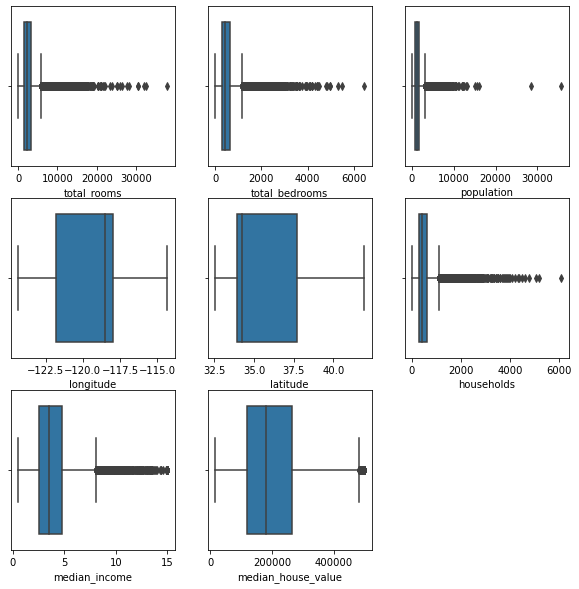

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

plt.subplot(3,3,1) 
sns.boxplot(x="total_rooms", data=train)
plt.subplot(3,3,2) 
sns.boxplot(x="total_bedrooms", data=train)
plt.subplot(3,3,3) 
sns.boxplot(x="population", data=train)  

plt.subplot(3,3,4) 
sns.boxplot(x="longitude", data=train)
plt.subplot(3,3,5) 
sns.boxplot(x="latitude", data=train)
plt.subplot(3,3,6) 
sns.boxplot(x="households", data=train)  

plt.subplot(3,3,7) 
sns.boxplot(x="median_income", data=train)
plt.subplot(3,3,8) 
sns.boxplot(x="median_house_value", data=train)

In [37]:
train.loc[ train['total_rooms']>= 3152 , "total_rooms_level"] = 1
train.loc[ (train['total_rooms']> 2127) & (train['total_rooms'] <= 3151) , "total_rooms_level"] = 2
train.loc[ (train['total_rooms']> 1462) & (train['total_rooms'] <= 2127) , "total_rooms_level"] = 3
train.loc[ train['total_rooms'] <= 1462 , "total_rooms_level"] = 4
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household,bedrooms_household,population_household,total_rooms_level
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,2.718220,2.150424,1.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,4.105832,2.438445,1.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,1.487179,2.846154,4.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,1.491150,2.278761,3.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,1.244275,2.381679,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,6.008130,1.067751,2.457995,2.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,5.051613,1.135484,2.567742,2.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,5.870614,1.164474,2.728070,2.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,5.589958,1.154812,2.715481,2.0


In [38]:
train.loc[ train['median_income']>= 4.5 , "median_income_level"] = 10
train.loc[ (train['median_income']> 4.0) & (train['median_income'] <= 4.5) , "median_income_level"] = 9
train.loc[ (train['median_income']> 3.5) & (train['median_income'] <= 4.0) , "median_income_level"] = 8
train.loc[ (train['median_income']> 3.0) & (train['median_income'] <= 3.5) , "median_income_level"] = 7
train.loc[ (train['median_income']> 2.5) & (train['median_income'] <= 3.0) , "median_income_level"] = 6
train.loc[ (train['median_income']> 2.0) & (train['median_income'] <= 2.5) , "median_income_level"] = 5
train.loc[ (train['median_income']> 1.5) & (train['median_income'] <= 2.0) , "median_income_level"] = 4
train.loc[ (train['median_income']> 1.0) & (train['median_income'] <= 1.5) , "median_income_level"] = 3
train.loc[ (train['median_income']> 0.5) & (train['median_income'] <= 1.0) , "median_income_level"] = 2
train.loc[ (train['median_income']<= 0.5) , "median_income_level"] = 1
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,room_household,bedrooms_household,population_household,total_rooms_level,median_income_level
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0,11.889831,2.718220,2.150424,1.0,3.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0,16.522678,4.105832,2.438445,1.0,4.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0,6.153846,1.487179,2.846154,4.0,4.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0,6.641593,1.491150,2.278761,3.0,7.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0,5.549618,1.244275,2.381679,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0,6.008130,1.067751,2.457995,2.0,5.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0,5.051613,1.135484,2.567742,2.0,6.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0,5.870614,1.164474,2.728070,2.0,7.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,5.589958,1.154812,2.715481,2.0,4.0


<AxesSubplot:xlabel='total_rooms_level', ylabel='median_house_value'>

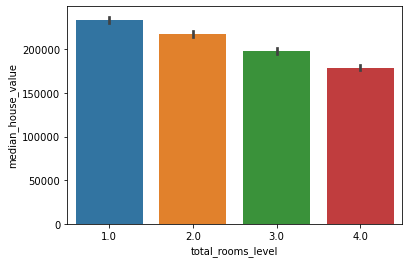

In [39]:
sns.barplot(x='total_rooms_level', y='median_house_value', data=train )

In [40]:
sns.barplot(x='total_bedrooms_level', y='median_house_value', data=train )

ValueError: Could not interpret input 'total_bedrooms_level'